# ROC Curves for best model from each modeling section

In [6]:
import pandas as pd

# Load data
roc_data_log_reg = pd.read_csv("../../data/roc_data/roc_log_reg.csv")
roc_data_rf = pd.read_csv("../../data/roc_data/roc_random_forest.csv")
roc_data_ensemble = pd.read_csv("../../data/roc_data/roc_ensemble.csv")
roc_data_cnn = pd.read_csv("../../data/roc_data/roc_cnn.csv")

In [2]:
from sklearn.metrics import auc

# Compute AUC score
auc_log_reg = auc(roc_data_log_reg["fpr"], roc_data_log_reg["tpr"])
auc_rf = auc(roc_data_rf["fpr"], roc_data_rf["tpr"])
auc_ensemble = auc(roc_data_ensemble["fpr"], roc_data_ensemble["tpr"])
auc_cnn = auc(roc_data_cnn["fpr"], roc_data_cnn["tpr"])

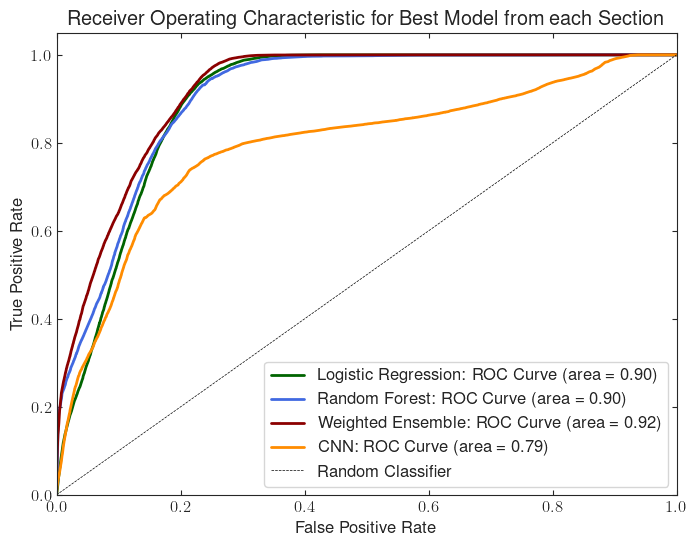

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("white")
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] =  "Helvetica"
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.direction"] = "in" 
plt.rcParams["ytick.direction"] = "in" 
plt.rcParams["xtick.top"] = True
plt.rcParams["xtick.bottom"] = True 
plt.rcParams["ytick.right"] = True 
plt.rcParams["ytick.left"] = True

# Plot ROC curves
plt.figure(figsize=(8, 6))
sns.lineplot(
    x=roc_data_log_reg["fpr"],
    y=roc_data_log_reg["tpr"],
    label=f'Logistic Regression: ROC Curve (area = {auc_log_reg:.2f})',
    lw=2,
    color="darkgreen",
    errorbar=None
)
sns.lineplot(
    x=roc_data_rf["fpr"],
    y=roc_data_rf["tpr"],
    label=f'Random Forest: ROC Curve (area = {auc_rf:.2f})',
    lw=2,
    color="royalblue",
    errorbar=None)
sns.lineplot(
    x=roc_data_ensemble["fpr"],
    y=roc_data_ensemble["tpr"],
    label=f'Weighted Ensemble: ROC Curve (area = {auc_ensemble:.2f})',
    lw=2,
    color="darkred",
    errorbar=None)
sns.lineplot(
    x=roc_data_cnn["fpr"],
    y=roc_data_cnn["tpr"],
    label=f'CNN: ROC Curve (area = {auc_cnn:.2f})',
    lw=2,
    color="darkorange",
    errorbar=None)
sns.lineplot(x=[0, 1], y=[0, 1], color='black', lw=0.5, linestyle='--', errorbar=None, label="Random Classifier")

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Best Model from each Section')
plt.legend(loc="lower right")
plt.savefig("../../figs/roc_all_models.pdf")
plt.show()